# Caso de ejemplo

- La empresa Mustage SA esta desarrollando una plataforma para otorgar creditos de bajo monto
- El tiempo para completar exitosamente una consulta de información de clietnes ante las fuentes de buro no debe ser superior a 30 segundos en promedio
- Muestra de n = 50 clientes consultados
- La empresa esta dispuesta a asumir un error del 5% en la prubea

**¿El proveedor de información satisface estadisticamente este requerimiento?**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import expon, uniform, norm

In [2]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]

In [3]:
len(muestra)

50

In [4]:
# Hipotesis

media, var, skew, kurt = expon.stats(scale=30, moments='mvsk')

In [7]:
# Paso 1: Parametro lambda
# Paso 2: HP

mu = 30
mu > 30

# Paso 3: Definir mejor estimador para nuestro parametro, por teorema de limite central el mejor es el promedio
# Estimador
# Paso 4: Distribucion
promedio = np.mean(muestra)
promedio

40.66

In [9]:
# Paso 5
z = (promedio - mu) / np.sqrt(var/50)
z

2.5125860958161983

In [17]:
# Paso 6: generar criterio de rechazo y toleracia al error

alpha = 0.05

# Criterio de rechazo

data_norm = norm.rvs(size=1000000)

[Text(0.5, 1.0, 'Distribucion Normal')]

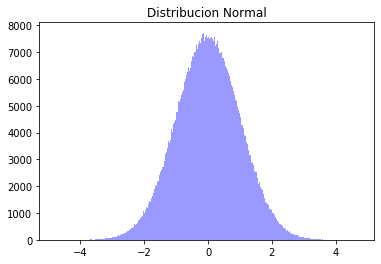

In [19]:
ax = sns.distplot(data_norm, bins=500, kde=False, color='blue')
ax.set(title='Distribucion Normal')

In [21]:
valor_critico = norm.ppf(1-alpha, loc=0, scale=1)
valor_critico

1.6448536269514722

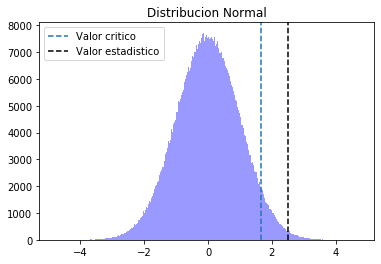

In [24]:
ax = sns.distplot(data_norm, bins=500, kde=False, color='blue')
ax.set(title='Distribucion Normal')
ax.axvline(x = valor_critico, linestyle='--', label='Valor critico')
ax.axvline(x = z, linestyle='--', label='Valor estadistico', c='k')
ax.legend()

# Conclusion

Como vemos que z es mayor que al valor critico, podemos afirmar con un 95% de fiabilidad que el proveedor no está en la capacidad de responder en menos de 30 segundos. Es decir **RECHAZAMOS** hipotesis